## Q.Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tc = pd.read_csv('/content/ToyotaCorolla.csv', encoding='latin1')
tc.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
# to check the columns data type
tc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
tc.shape

(1436, 38)

In [ ]:
car = tc[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
car.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
# To check the data types
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
# check null values
car.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
# check the duplicated values
car[car.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
# drop the duplicated record
car = car.drop_duplicates()

In [ ]:
car.duplicated().sum()

0

In [ ]:
car1 = car.rename({"Age_08_04" : "Age","Quarterly_Tax" : "QT","Weight":"WT"}, axis='columns')
car1.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Correlation Analysis

In [ ]:
car1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WT,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


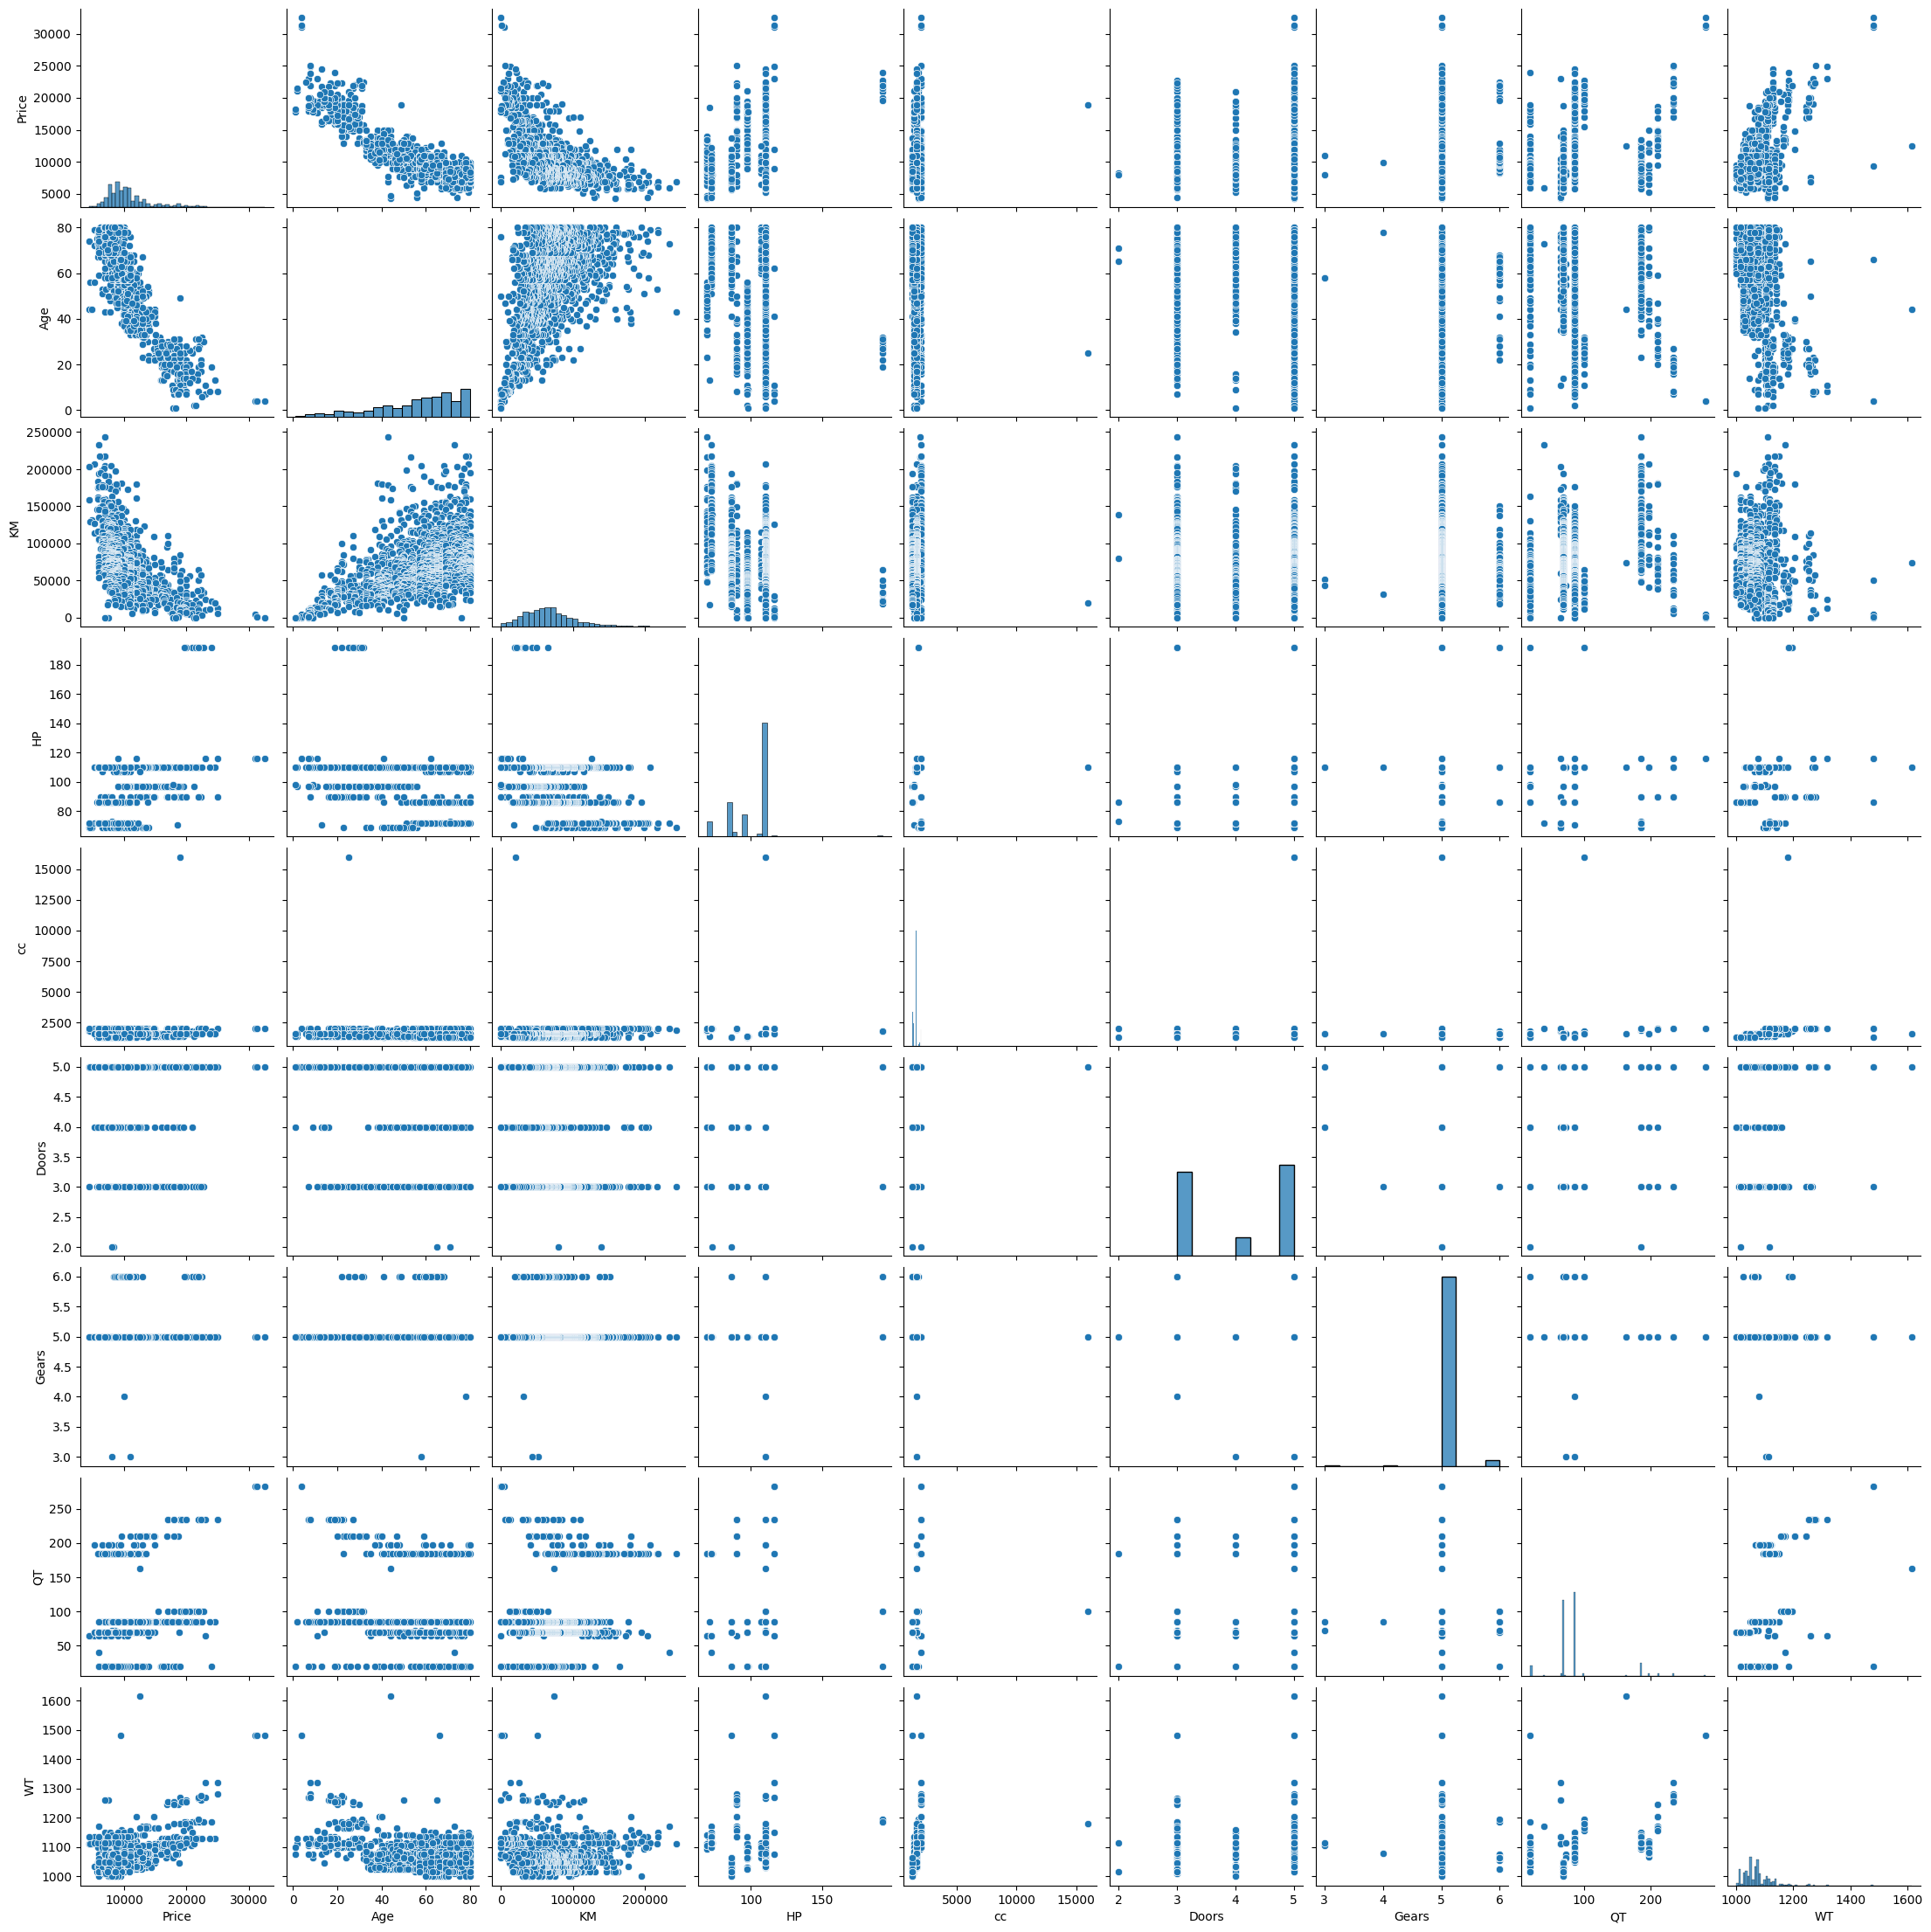

In [ ]:
sns.pairplot(car1)

## **Model Building**

In [ ]:
import statsmodels.formula.api as smf
car1.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'WT'], dtype='object')

In [ ]:
# Creating the model
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=car1).fit()
model

## Model Testing

In [ ]:
# finding the coeff , p_values, t_values, and R_values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:56:36   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
WT            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Simple Linear Regression Model**

Build Simple Linear Regression model and Multi Linear Regression Models for insignificance variables 'AD' and 'MS' . Also find their t_values and p_values

In [ ]:
car.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [ ]:
model_c = smf.ols('Price~cc', data=car1).fit()
model_c.tvalues, model_c.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [ ]:
model_d = smf.ols('Price~Doors', data=car1).fit()
model_d.tvalues, model_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [ ]:
model_cd = smf.ols('Price~Doors+cc', data=car1).fit()
model_cd.tvalues, model_cd.pvalues

(Intercept    12.786341
 Doors         6.752236
 cc            4.268006
 dtype: float64,
 Intercept    1.580945e-35
 Doors        2.109558e-11
 cc           2.101878e-05
 dtype: float64)

## Model validation
calculating VIF = 1/(1-Rsquare) for all independent variables

Collinearity problem check

In [ ]:

car1.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'WT'], dtype='object')

In [ ]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+WT',data=car1).fit().rsquared
vif_Age= 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+WT',data=car1).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QT+WT',data=car1).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+HP+KM+Doors+Gears+QT+WT',data=car1).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+HP+KM+cc+Gears+QT+WT',data=car1).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+HP+KM+Doors+cc+QT+WT',data=car1).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_QT = smf.ols('QT~Age+HP+KM+Doors+Gears+cc+WT',data=car1).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_WT = smf.ols('WT~Age+HP+KM+Doors+Gears+QT+cc',data=car1).fit().rsquared
vif_WT = 1/(1-rsq_WT)


# Storing vif values in a data frame
df = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','WT'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_WT,]}
Vif_df = pd.DataFrame(df)
Vif_df

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,WT,2.487180


## **Residual Analysis**

## Test for Normality of Residuals(Q-Q plot)

Text(0.5, 1.0, 'Q-Q Plot')

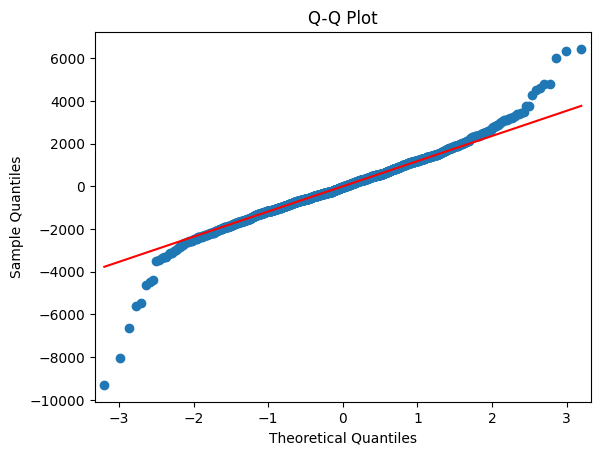

In [ ]:
import statsmodels.api as sm

sm.qqplot(model.resid,line='q')
plt.title('Q-Q Plot')

In [ ]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [ ]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

## Residual Plot for Homoscedasticity

In [ ]:
def get_Standardized_values(vals):
  return (vals-vals.mean())/vals.std()

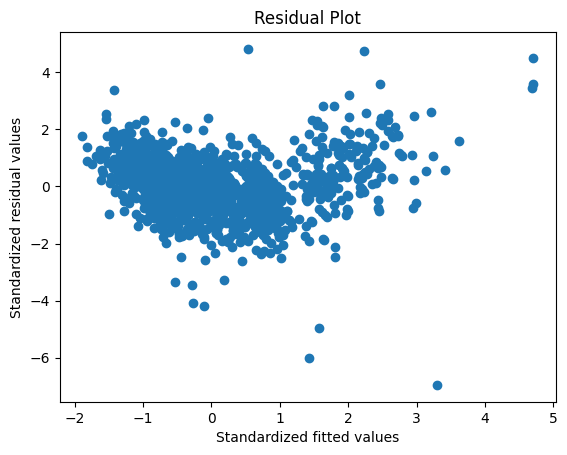

In [ ]:
plt.scatter( get_Standardized_values(model.fittedvalues),
             get_Standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## **To test for Errors (Residual Vs Regressor)**

eval_env: 1


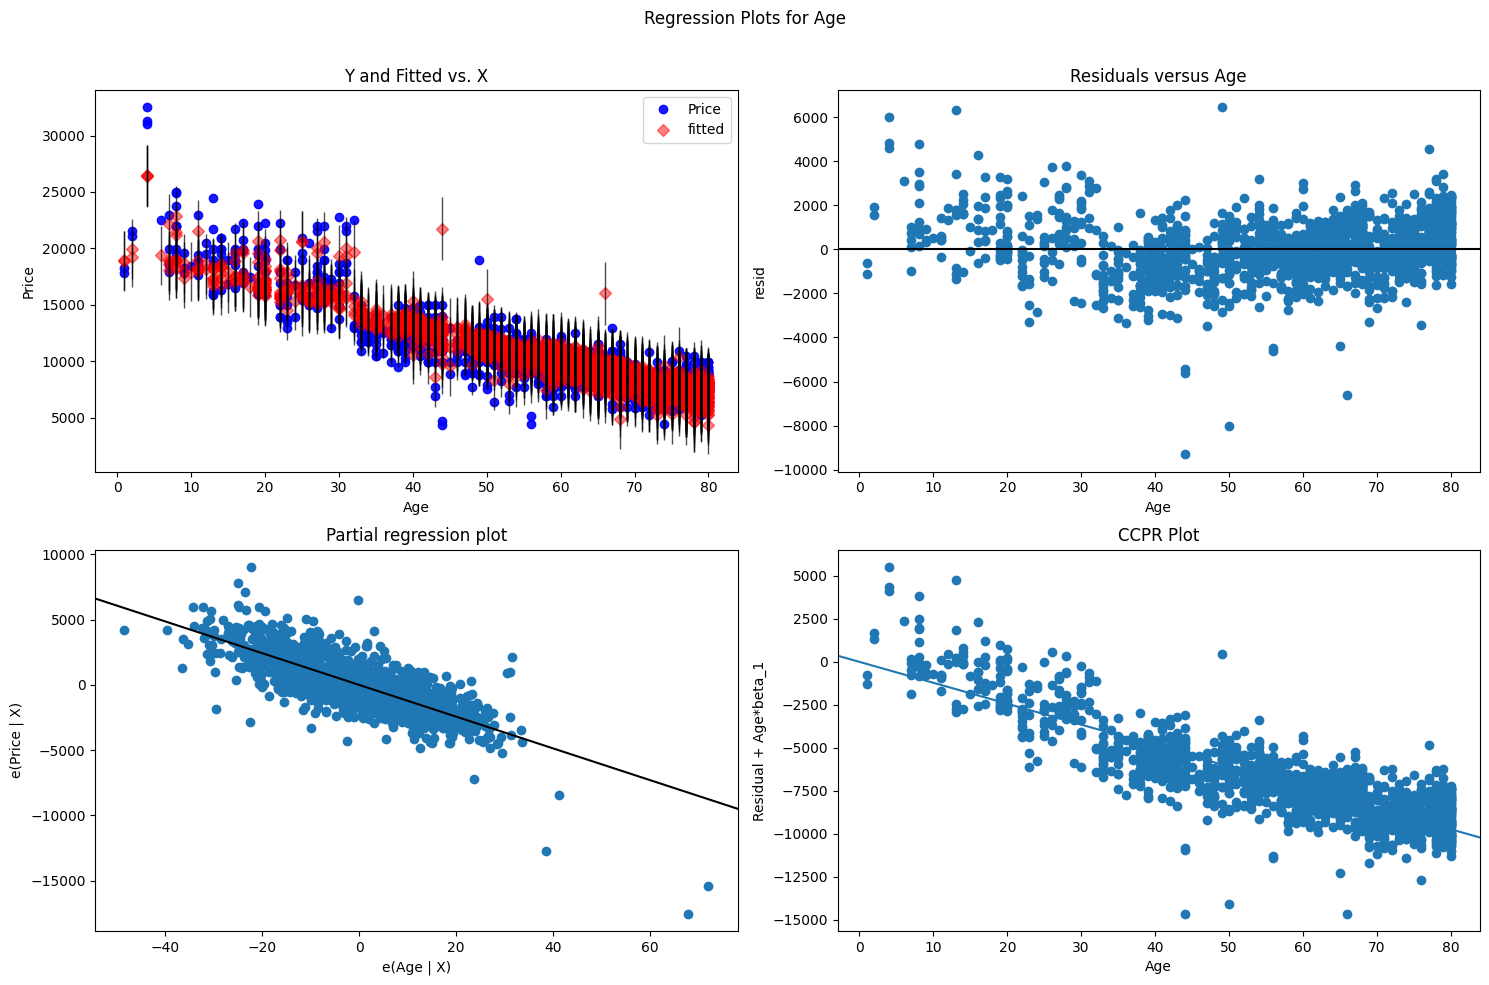

In [ ]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model, 'Age', fig=fig)
plt.show()

eval_env: 1


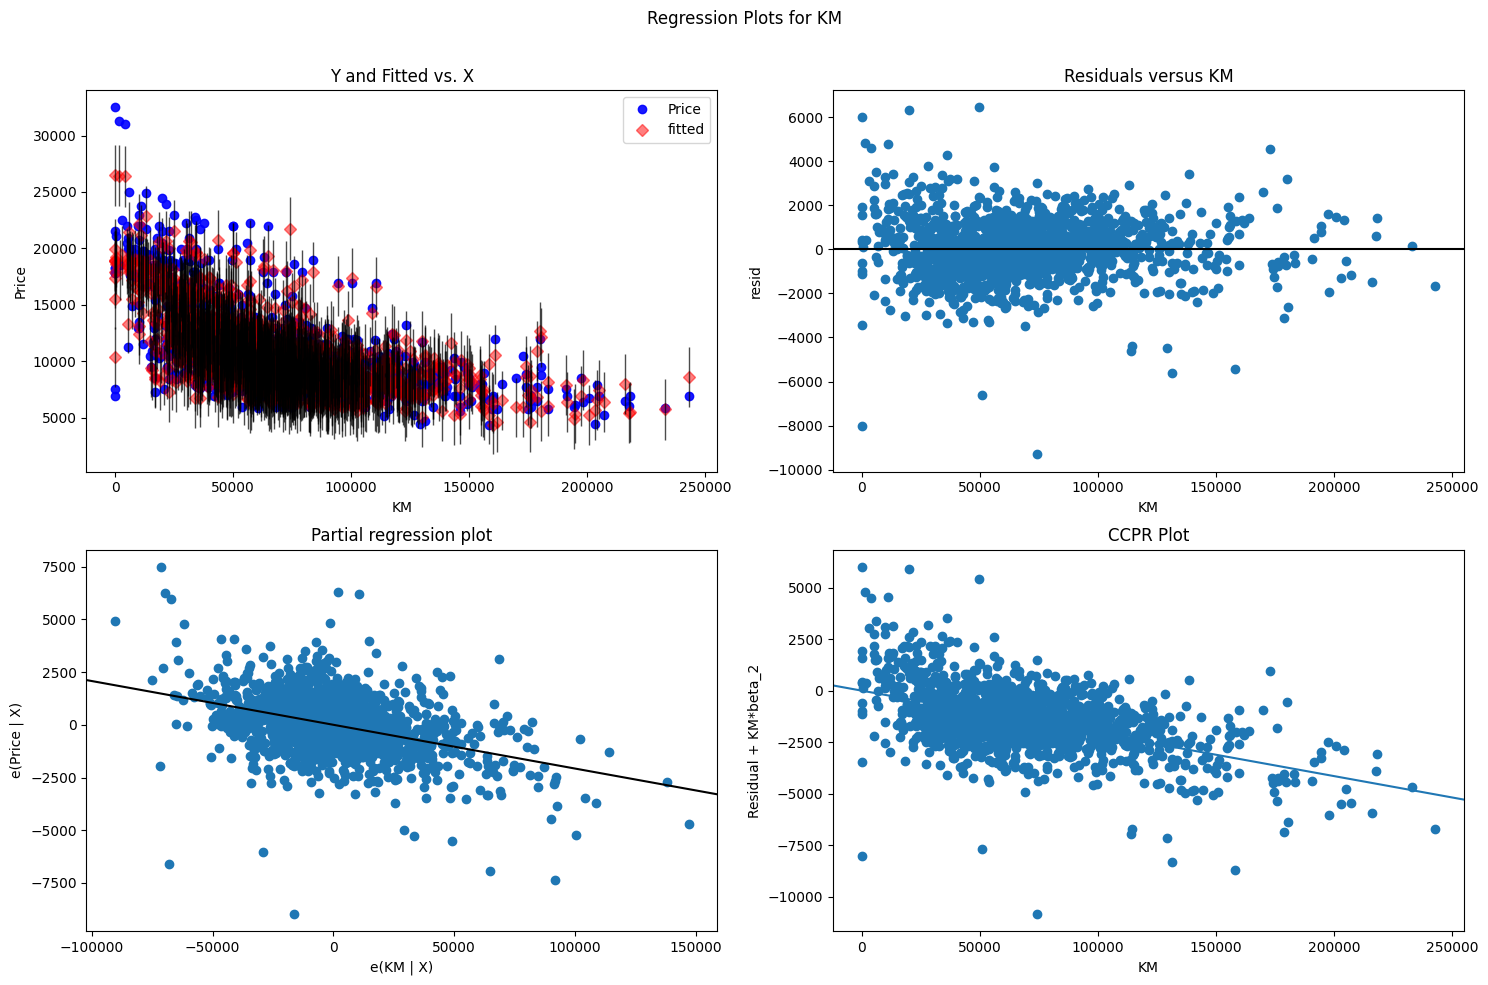

In [ ]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

eval_env: 1


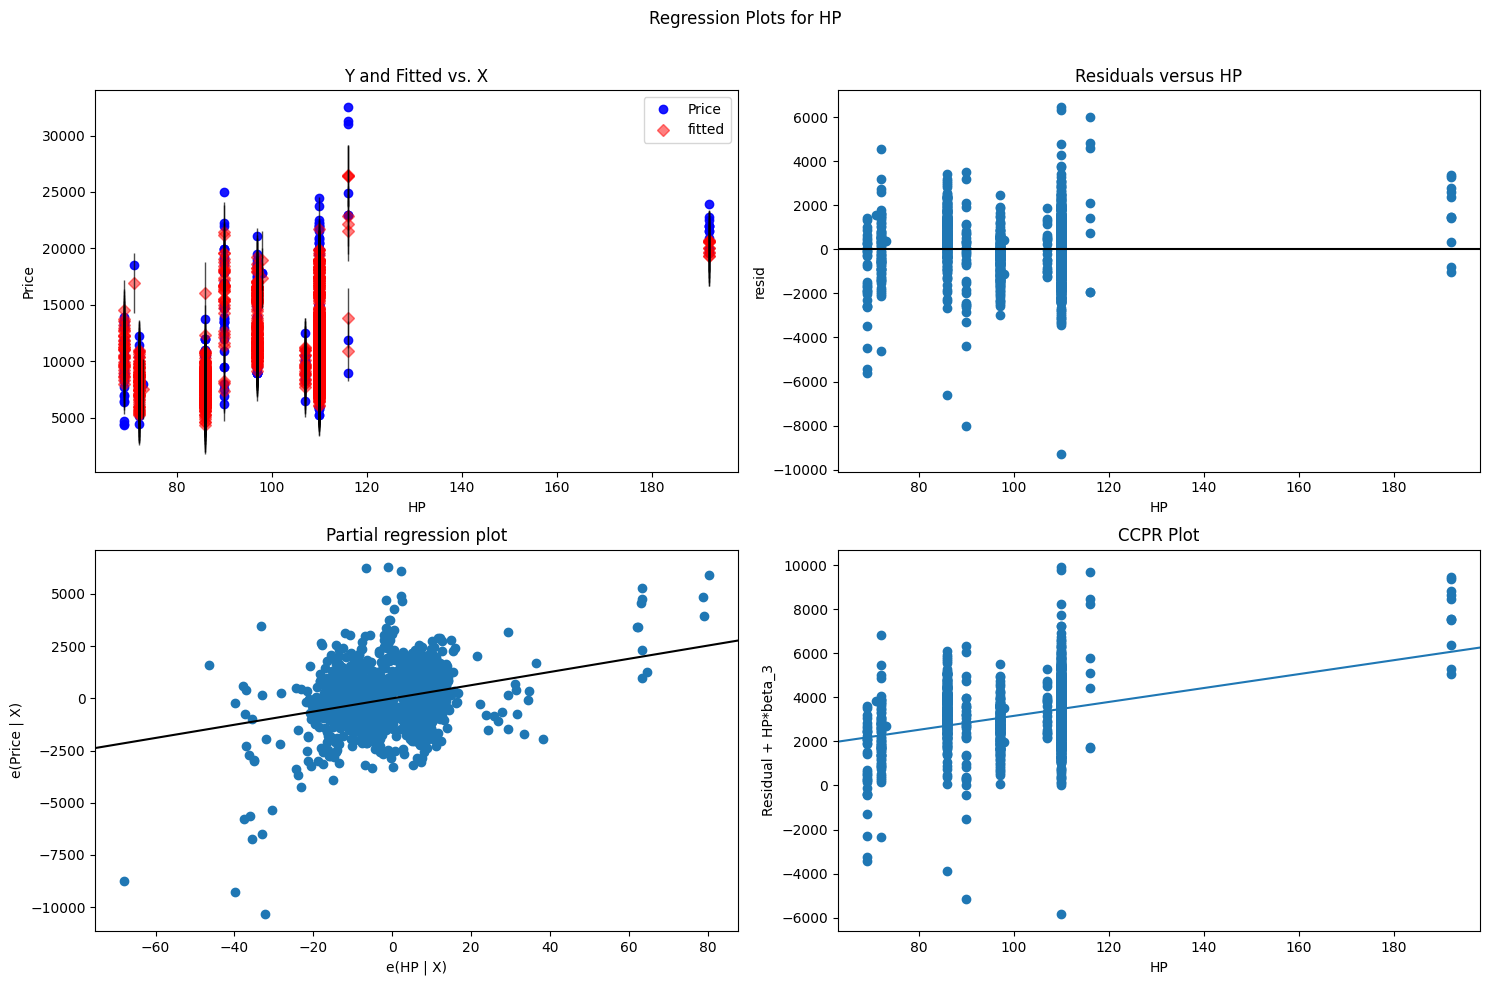

In [ ]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

eval_env: 1


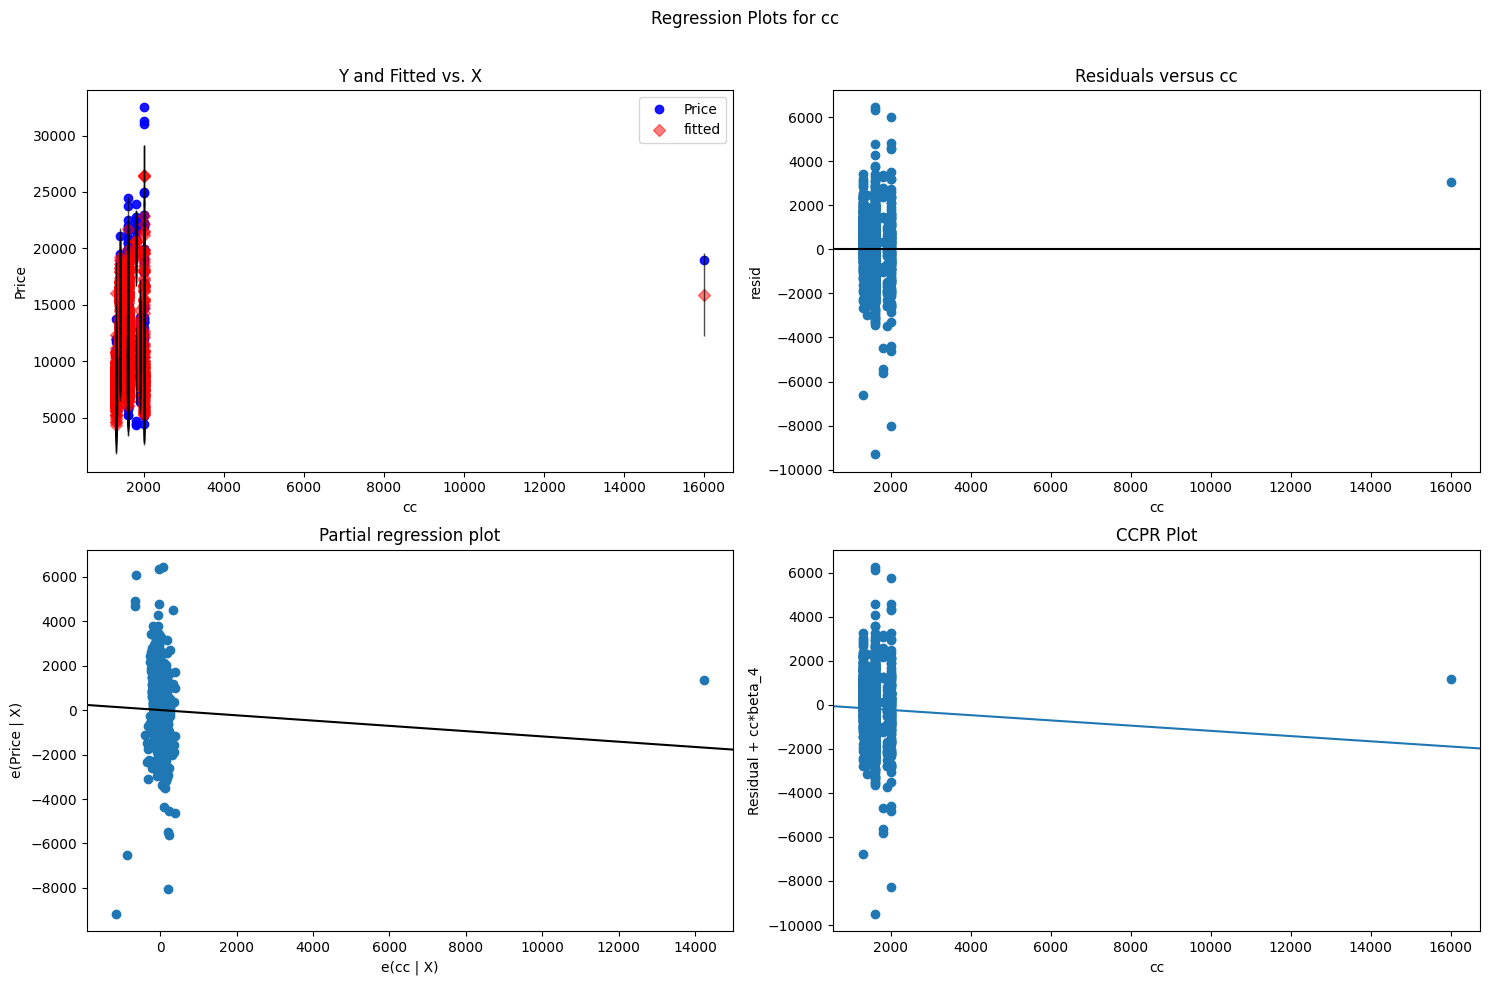

In [ ]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model, 'cc', fig=fig)
plt.show()

eval_env: 1


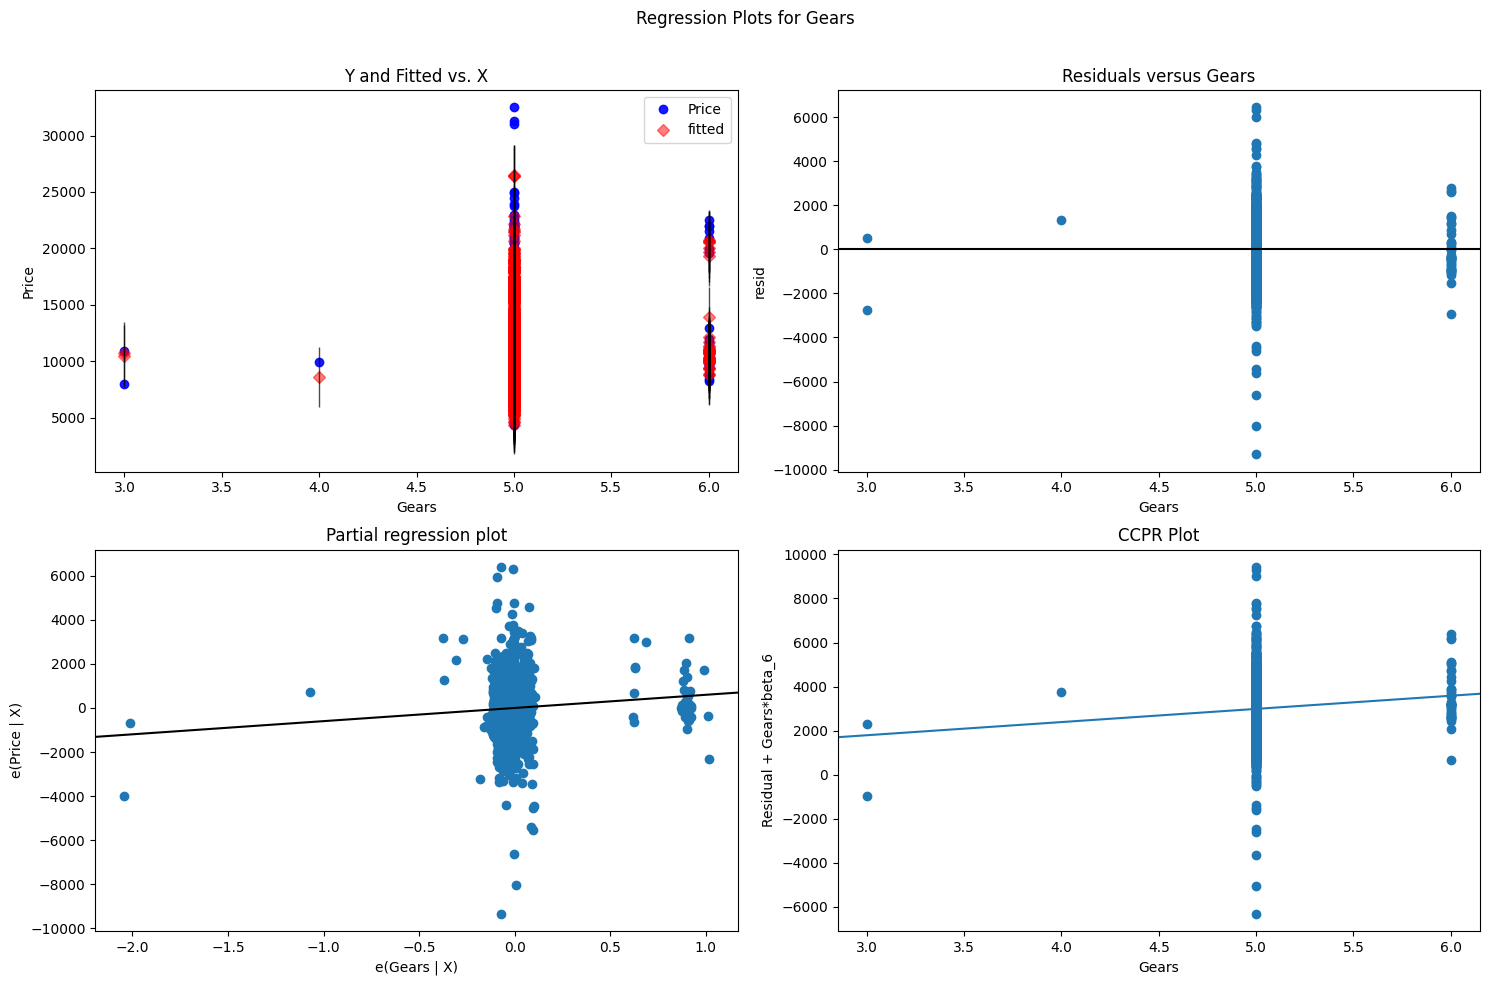

In [ ]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

eval_env: 1


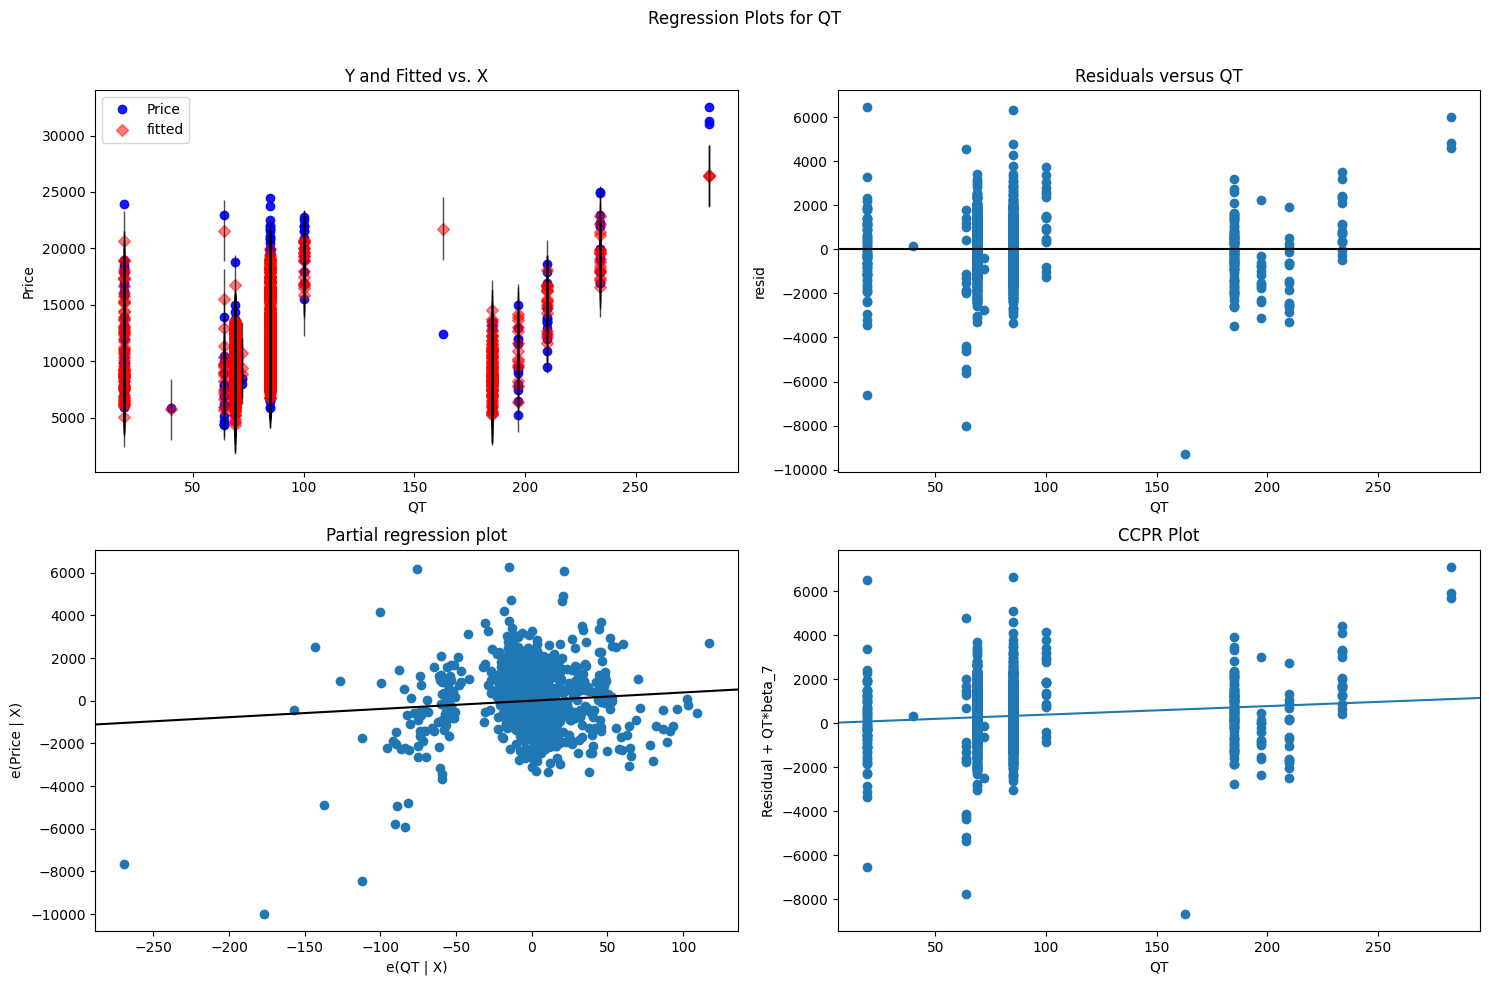

In [ ]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model, 'QT', fig=fig)
plt.show()

eval_env: 1


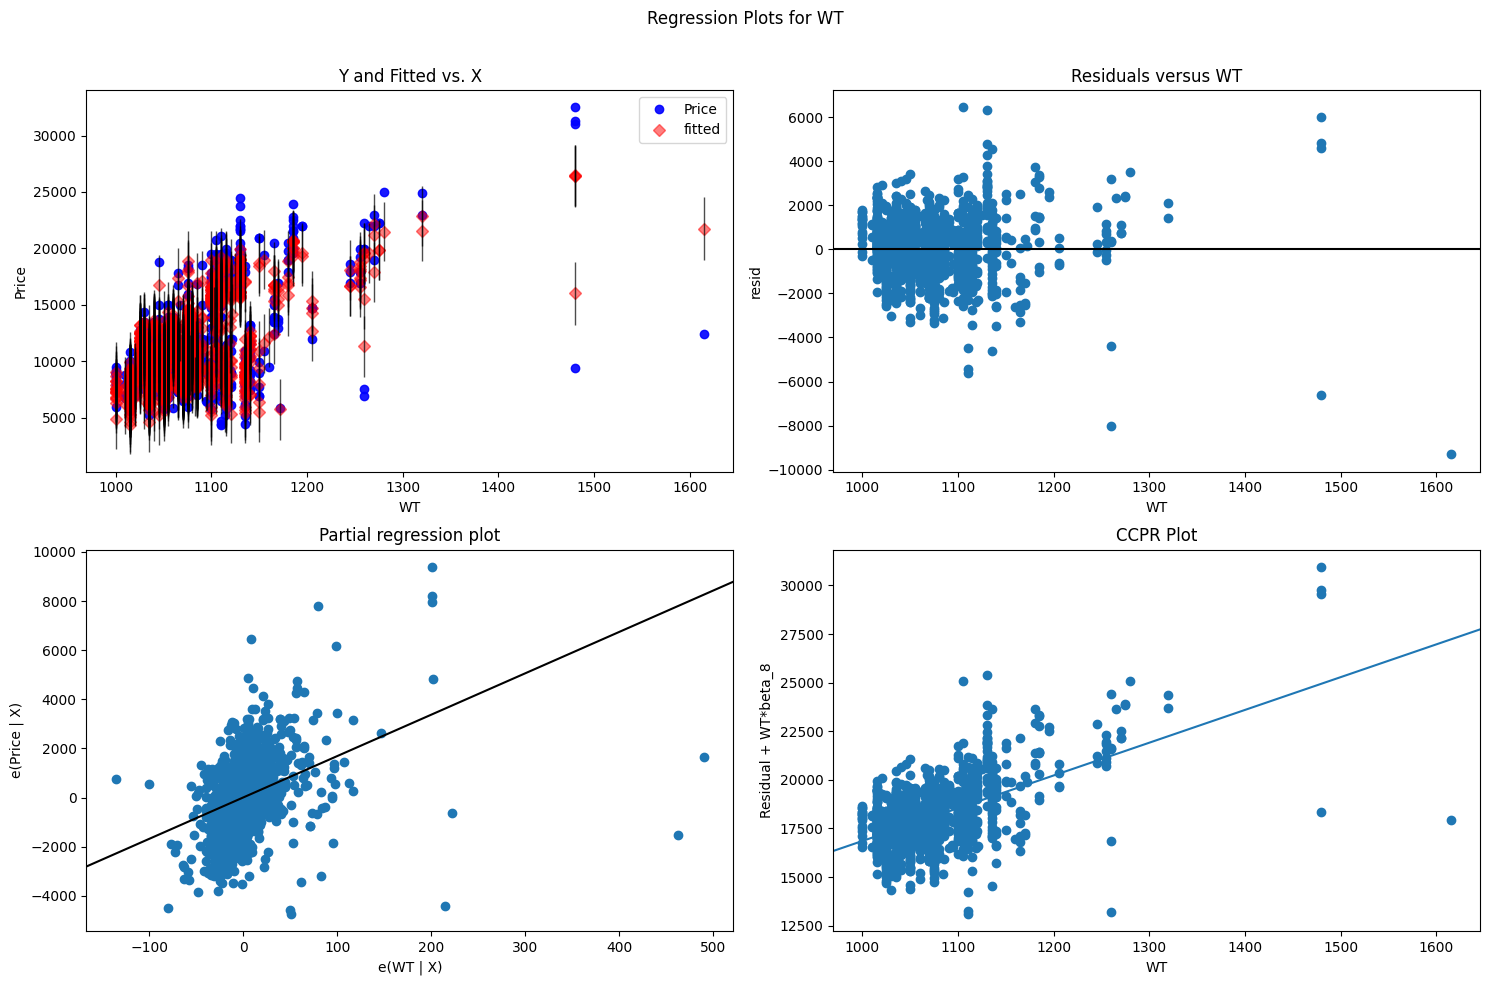

In [ ]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

## **Model Deletion Diagnostics**
## Detecting Influencers or Outliers
## 1) Cook's Distance

In [ ]:
# If Cook's distance > 1 , then it is an outlier
(c,_) = model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

<function matplotlib.pyplot.show(close=None, block=None)>

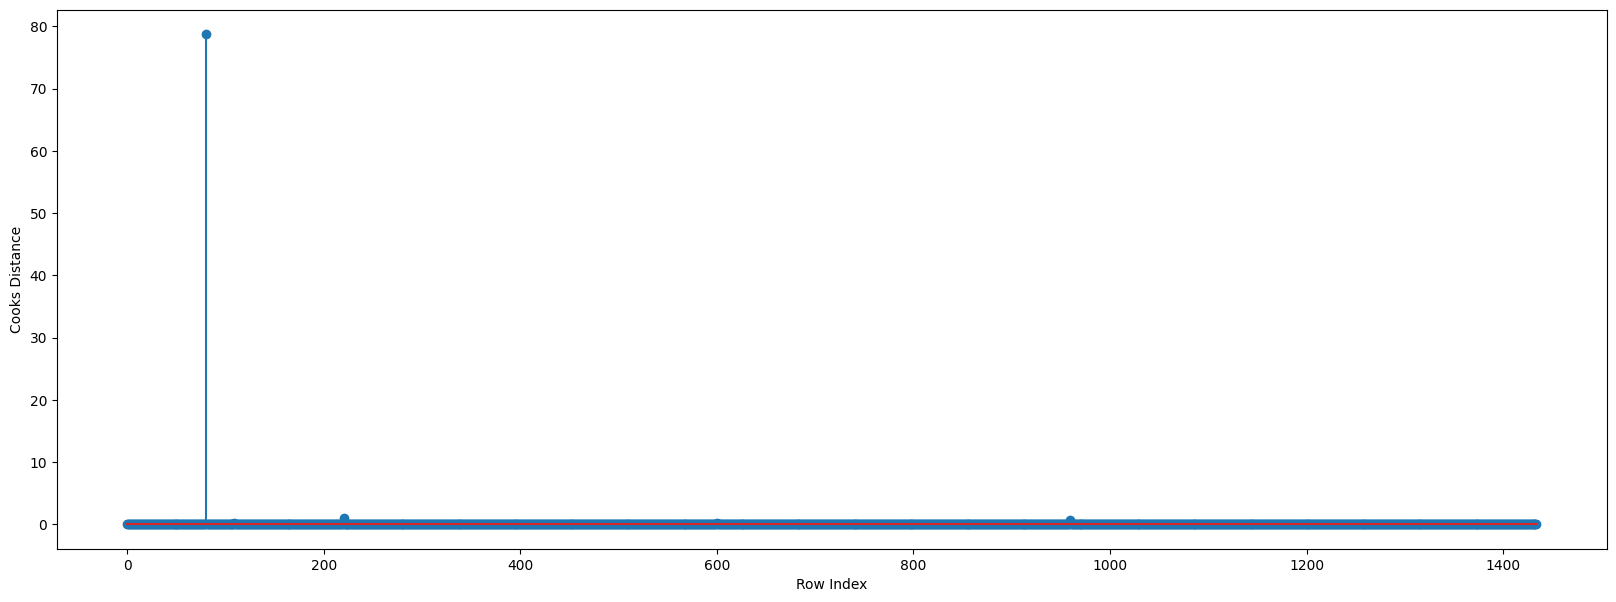

In [ ]:
# plot the influencers using the stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show

In [ ]:
# Index and value of influencer where c>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

## 2) High Influence plots

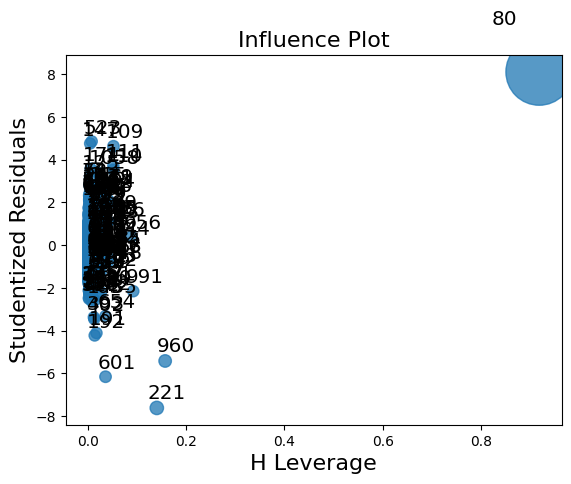

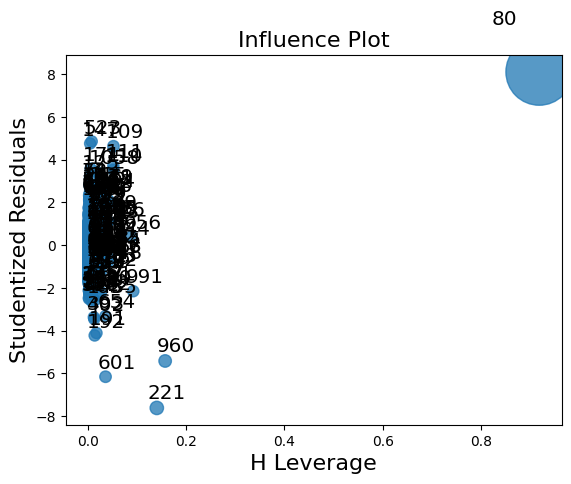

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

In [ ]:
# Leverage Cuttoff value = 3*(k+1)/n ; k = no.of features/columns & n = no. of data points
k = car1.shape[1]
n = car1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [ ]:
car1[car.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the Model

In [ ]:
# Creating a copy of data so that original dataset is not affected
car_new = car1.copy()
car_new

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
car2 = car_new.drop(car_new.index[[80]],axis=0).reset_index(drop=True)
car2

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## **Final Model**

In [ ]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=car2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    car2=car2.drop(car2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    car2
else:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=car2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


## Model predictions

In [ ]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':15,"KM":50000,"HP":90,"cc":1200,"Doors":4,"Gears":5,"QT":69,"WT":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,WT
0,15,50000,90,1200,4,5,69,1012


In [ ]:
# Prediction Price
final_model.predict(new_data)

0    14544.230432
dtype: float64

In [ ]:
# prediction of price with 90.02% accuracy
pred_y = final_model.predict(car1)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1431     9161.230587
1432     8536.091326
1433     8681.531063
1434     8793.668694
1435    10860.695492
Length: 1435, dtype: float64

In [ ]:
data2 = {'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table = pd.DataFrame(data2)
table

,Prep_Models,Rsquared
0,Model,0.883968
1,Final_Model,0.888240


In [ ]:
model.params

Intercept   -14682.483085
Age           -112.062887
KM              -0.016971
HP              36.558721
cc              -3.785187
Doors         -121.980785
Gears          466.601420
QT               5.175394
WT              30.566656
dtype: float64